In [33]:
import yfinance as yf
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [13]:
sp = yf.download("^GSPC", start='2015-01-01', end=None)["Adj Close"]
data = pd.DataFrame(sp)
data = data.rename(columns={"Adj Close": "price"})
data['price-1'] = data['price'].shift(1)
data = data.dropna()
X = data[['price-1']]
y = data['price']

[*********************100%***********************]  1 of 1 completed


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
theil_u = (rmse/(np.sqrt(np.sum(y_test**2)/len(y_test))+np.sqrt(np.sum(y_pred**2)/len(y_pred))))
print(f"mse: {mse}")
print("rmse:", rmse)
print("Theil's U:", theil_u)

mse: 3517.136972067813
rmse: 59.30545482557075
Theil's U: 0.007092632364889332


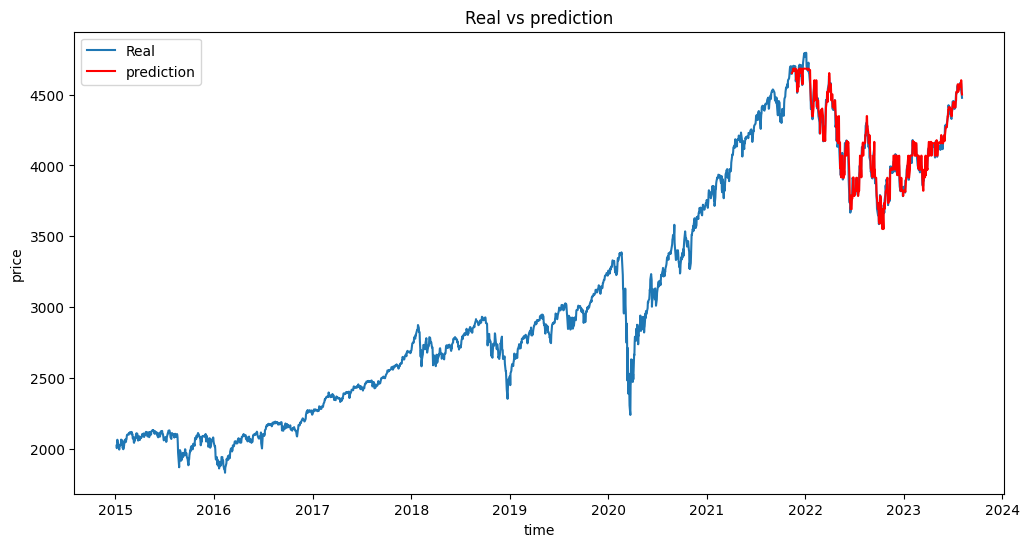

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['price'], label='Real')
plt.plot(data.index[len(X_train):], y_pred, label='prediction', color='red')
plt.xlabel('time')
plt.ylabel('price')
plt.title('Real vs prediction')
plt.legend()
plt.show()